In [1]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
df=pd.read_csv("C:/Users/Louis/Documents/AM2014-2015-2016/Data Science/Jupyter project/forestfires.csv")

In [3]:
df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


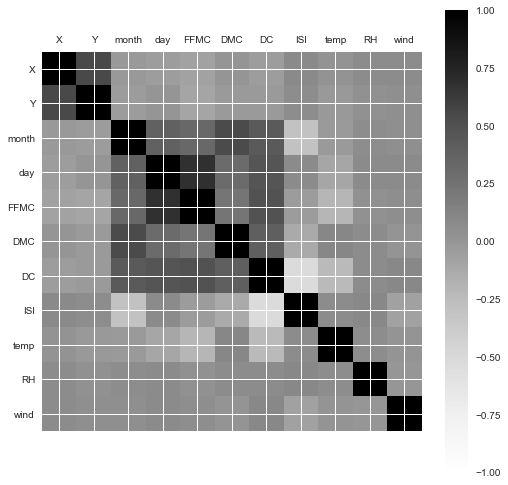

In [4]:
correlations = df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
fig.set_size_inches(8.5, 8.5)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(df))
ax.set_yticklabels(list(df))
plt.show()

In [5]:
df.drop(499, inplace=True)  #out of bound point (rain)
df.drop(22, inplace=True) #out of bound point (ISI)

In [6]:
df.head(30)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


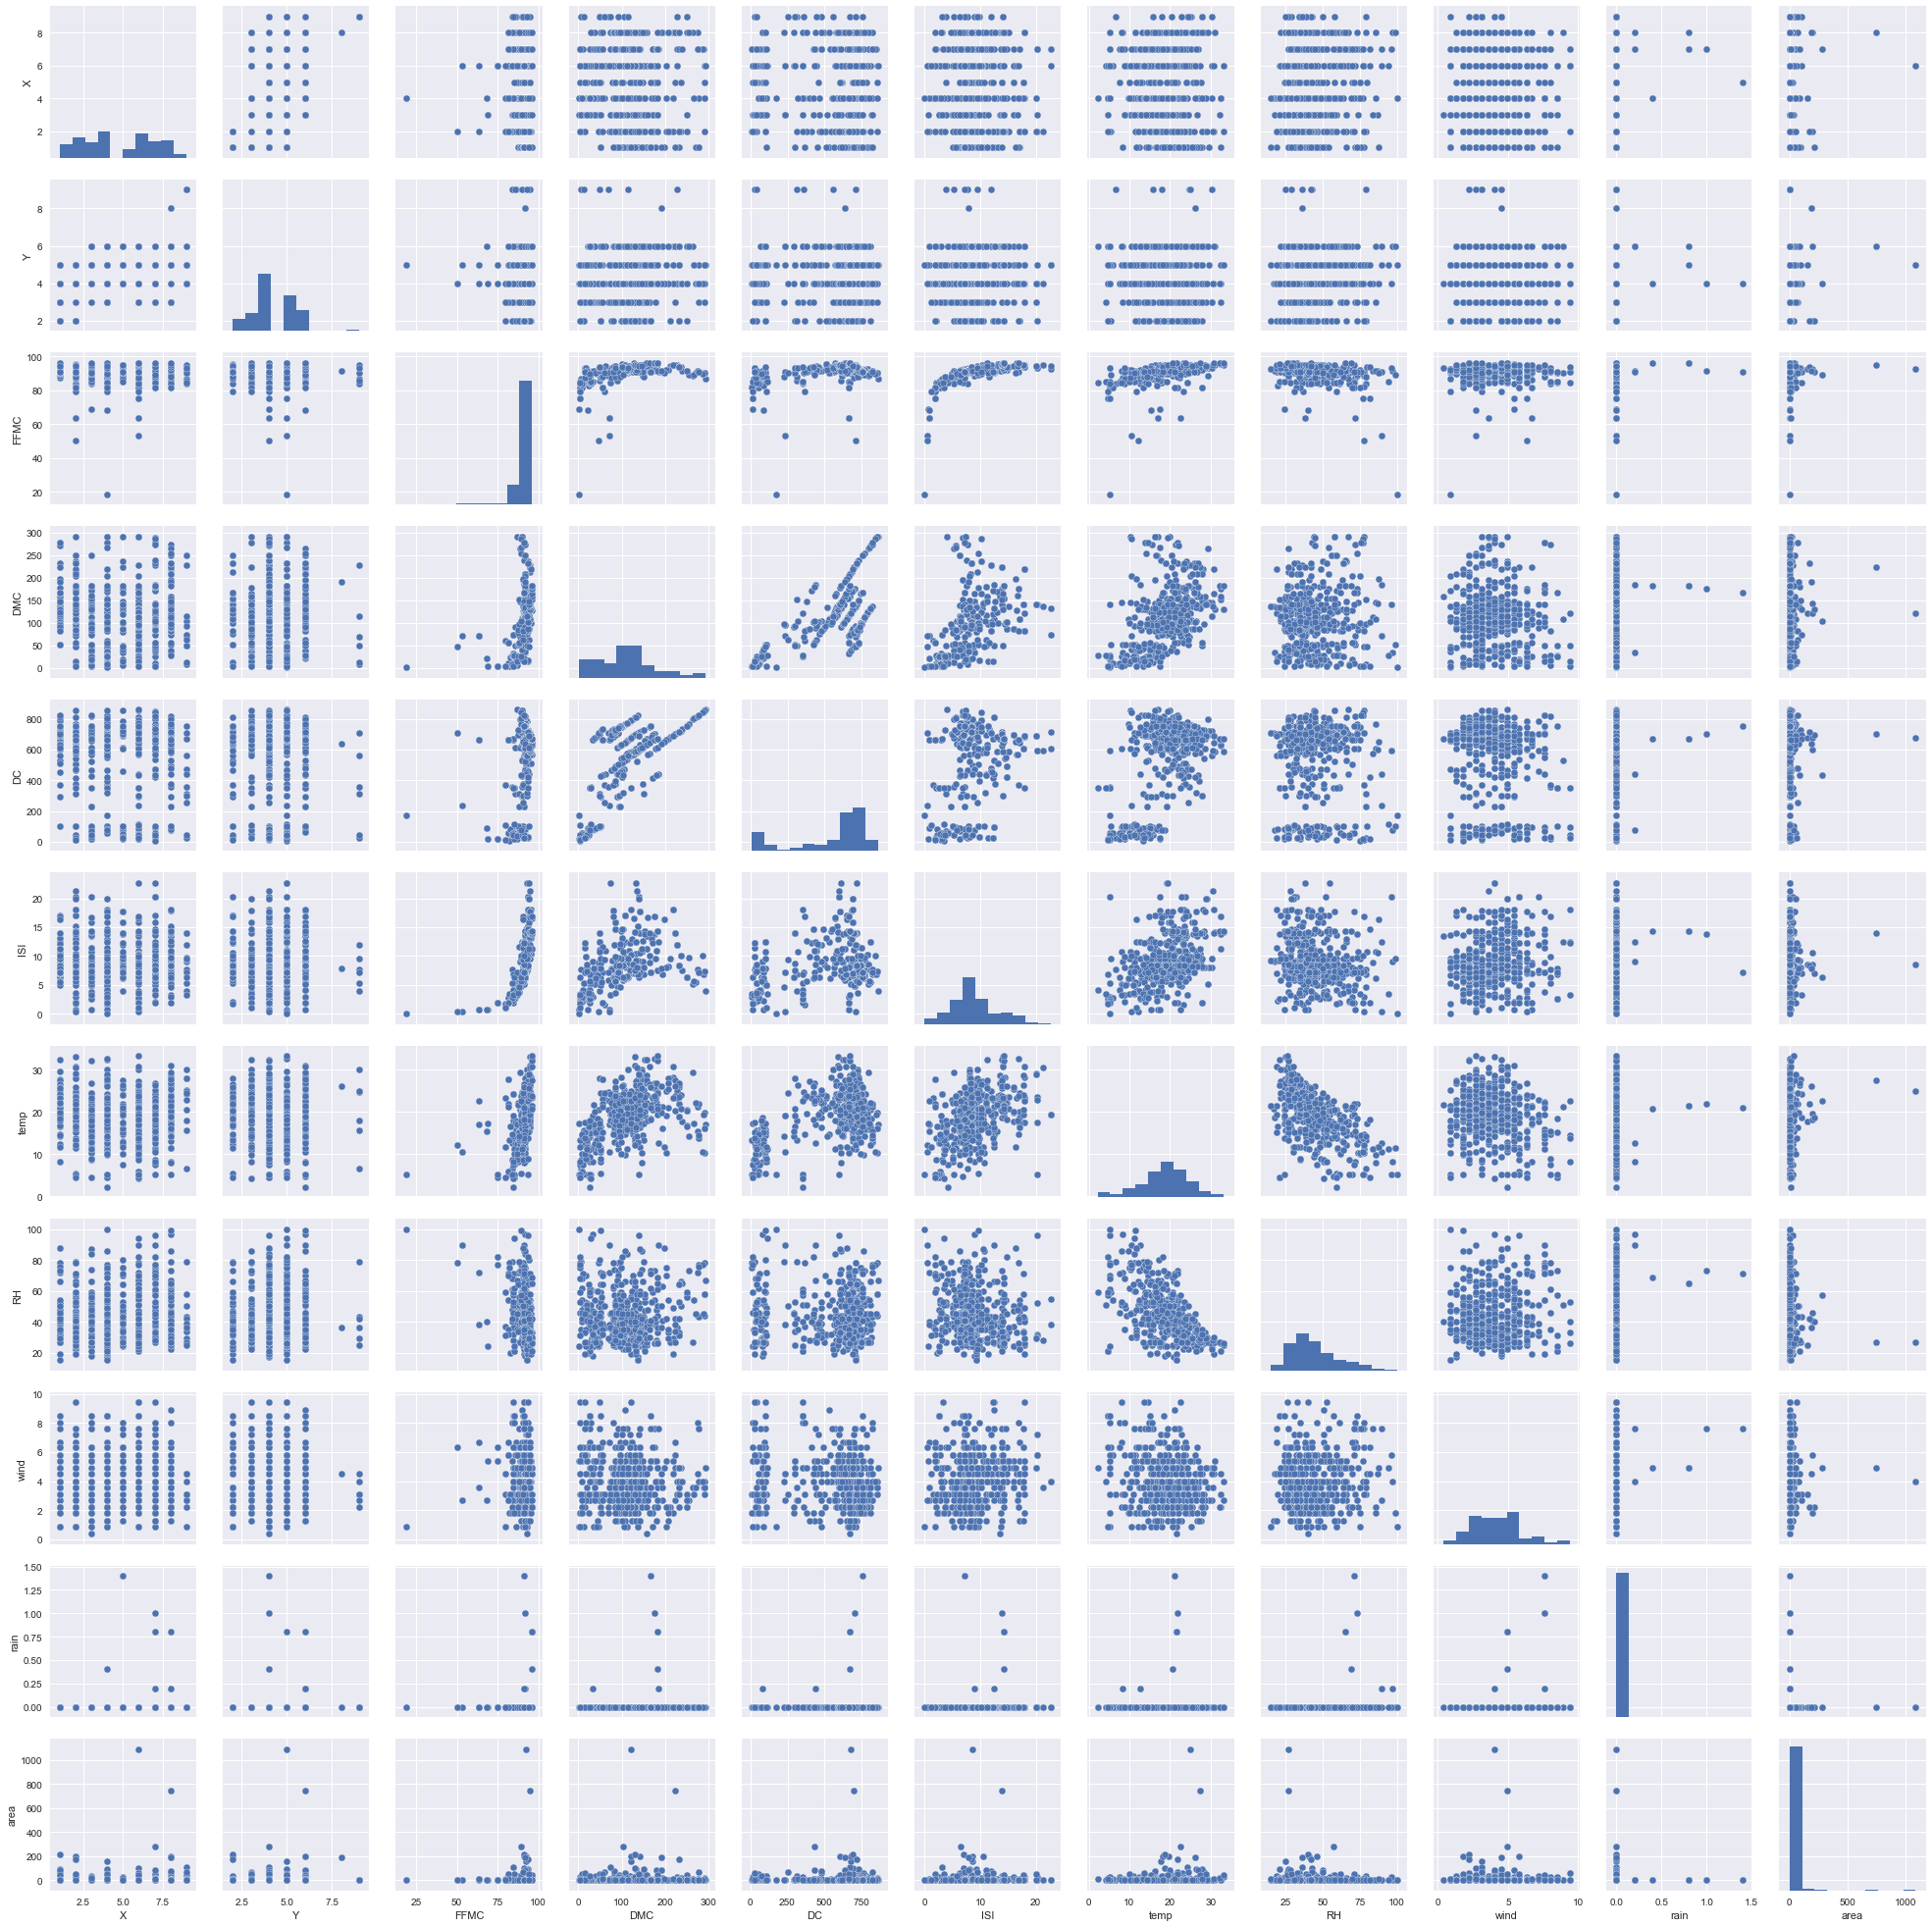

In [7]:
sns.pairplot(df)
plt.show()

In [31]:
(df['area']>0).sum()

270

In [40]:
df['log_area']=np.log(df['area'])
df_area=df[df['log_area']>-100]

C:\Users\Louis\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [42]:
df_area

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,-1.021651
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,-0.843970
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,-0.755023
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,-0.597837
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,-0.494296
143,1,2,jul,sat,90.0,51.3,296.3,8.7,16.6,53,5.4,0.0,0.71,-0.342490
144,2,5,aug,wed,95.5,99.9,513.3,13.2,23.8,32,5.4,0.0,0.77,-0.261365
145,6,5,aug,thu,95.2,131.7,578.8,10.4,27.4,22,4.0,0.0,0.90,-0.105361
146,5,4,mar,mon,90.1,39.7,86.6,6.2,13.2,40,5.4,0.0,0.95,-0.051293
147,8,3,sep,tue,84.4,73.4,671.9,3.2,24.2,28,3.6,0.0,0.96,-0.040822


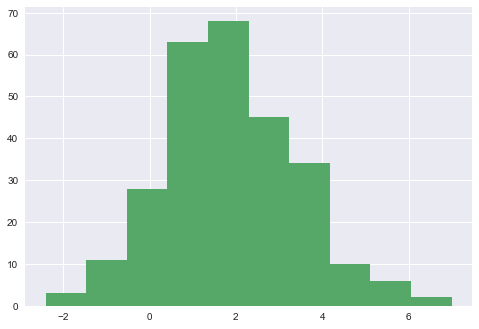

In [44]:
df_area['log_area'].hist()
plt.show()

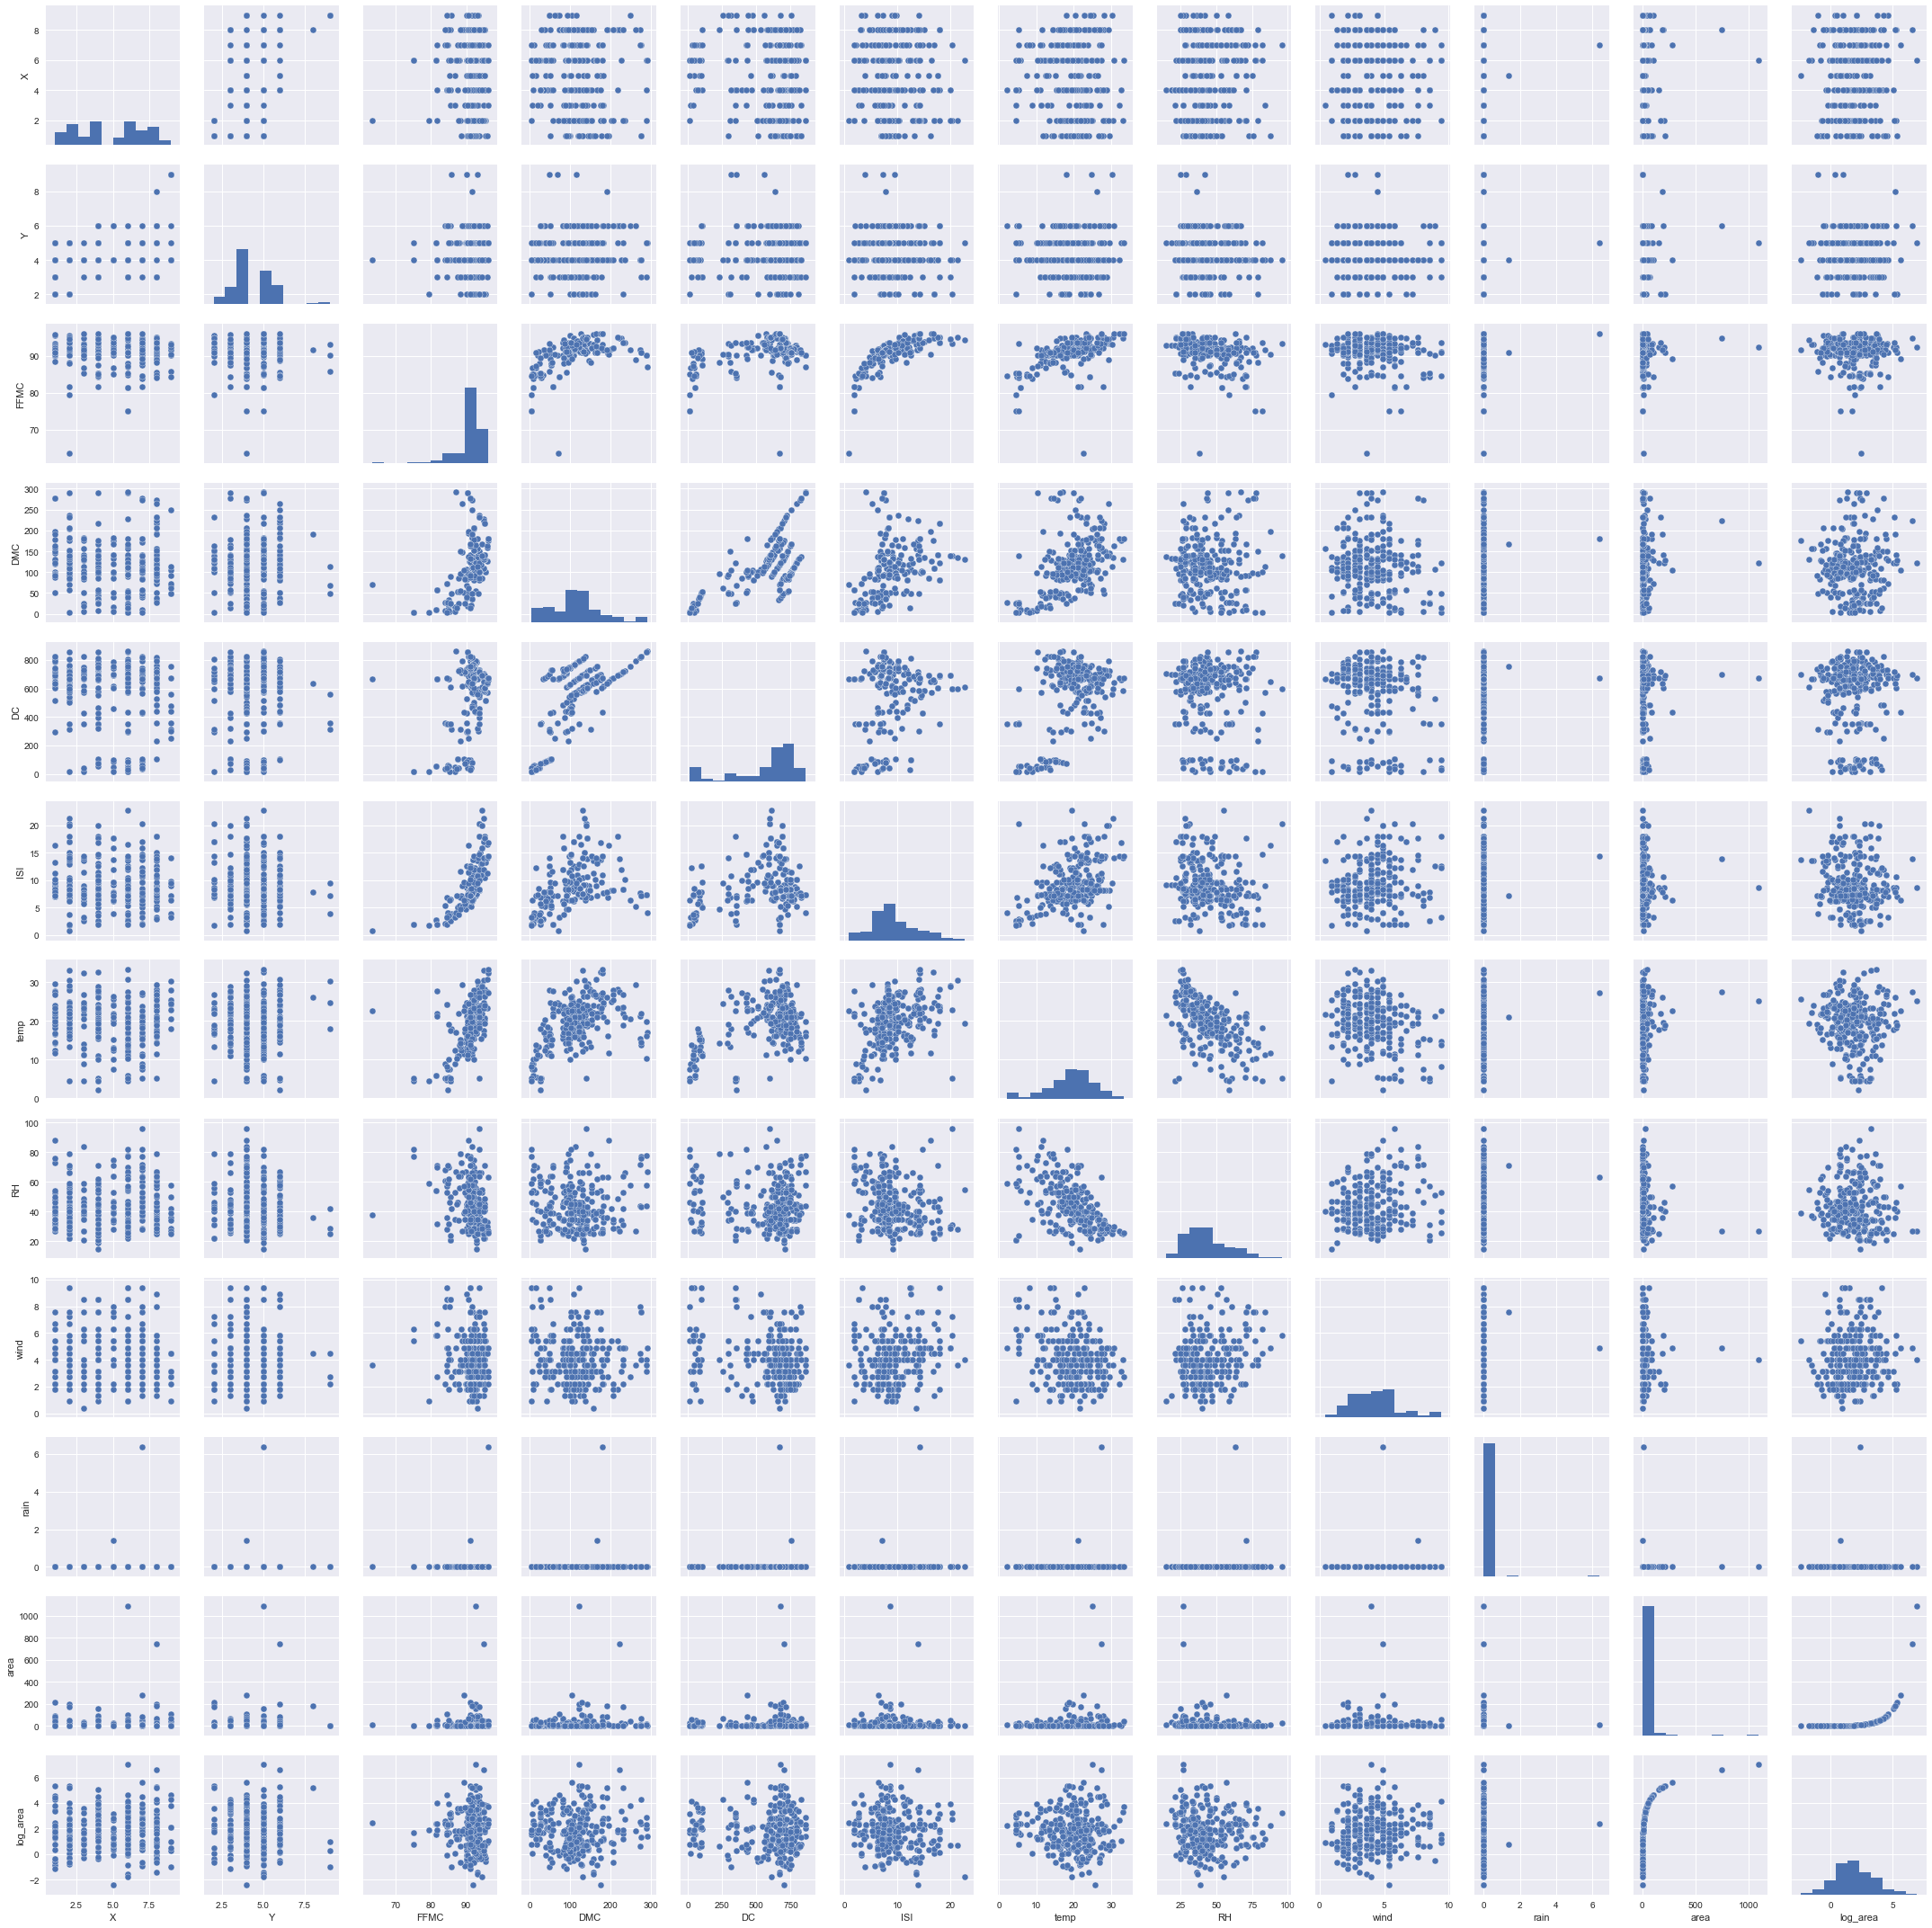

In [45]:
sns.pairplot(df_area)
plt.show()

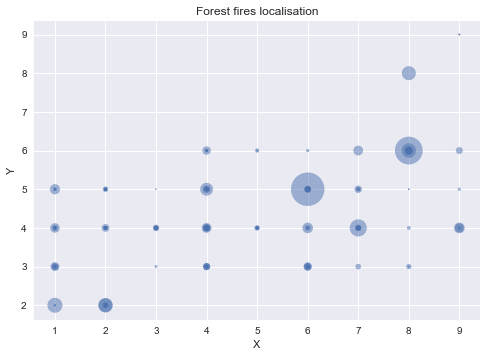

In [49]:

plt.scatter(df_area['X'],df_area['Y'],s=df_area['area'],alpha=0.5)
plt.title('Forest fires localisation')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()